# **SISTEM REKOMENDASI GAME MENGGUNAKAN PYTHON METODE: K-MEANS CLUSTERING & CONTENT-BASED FILTERING**

# **Impor dan Persiapan Data**

In [3]:
# library mengelola data dalam bentuk tabel (DataFrame).
import pandas as pd


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_excel('/content/gdrive/MyDrive/Kaggle/Rekomendasi Game Final.xlsx')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,ID,Name,Released,Rating,Genres,Platforms,Stores,Tags,Developers,Publishers,ESRB,Website
0,13536,Portal,2007-10-09,4.49,"Action, Puzzle","macOS, PC, Android, PlayStation 3, Xbox 360, L...","Steam, Google Play","Singleplayer, Steam Achievements, Atmospheric,...","Valve Software, NVIDIA Lightspeed Studios","Valve, Buka Entertainment, NVIDIA, CyberFront",Teen,http://www.whatistheorangebox.com/
1,13537,Half-Life 2,2004-11-16,4.48,"Action, Shooter","PC, macOS, Xbox 360, Linux, Xbox, Android","Steam, Google Play","Singleplayer, Steam Achievements, Multiplayer,...","Valve Software, NVIDIA Lightspeed Studios",Valve,Mature,http://www.half-life2.com
2,802,Borderlands 2,2012-09-18,4.01,"Action, Shooter, RPG","PlayStation 3, macOS, PC, Android, Linux, PS V...","PlayStation Store, Google Play, Steam, Xbox 36...","Singleplayer, Steam Achievements, Multiplayer,...","Aspyr Media, 2K, Gearbox Software, Sony Comput...","2K Games, Aspyr",Mature,http://www.borderlands2.com/
3,3439,Life is Strange,2015-01-29,4.12,Adventure,"iOS, PC, Linux, PlayStation 3, macOS, Xbox 360...","GOG, PlayStation Store, Steam, Xbox Store, Goo...","Singleplayer, Full controller support, Atmosph...",DONTNOD Entertainment,"Square Enix, Feral Interactive",Mature,https://www.lifeisstrange.com/en-us/games/life...
4,1030,Limbo,2010-07-21,4.14,"Action, Adventure, Indie, Puzzle, Platformer","PC, Android, PS Vita, PlayStation 4, PlayStati...","App Store, PlayStation Store, Xbox Store, Stea...","Singleplayer, Full controller support, Atmosph...","Double Eleven, Playdead, 鱼俞","Microsoft Studios, Playdead, 鱼俞",Teen,http://playdead.com/limbo


✅ Ringkasan Dataset

File "Data Game 1000.xlsx" berisi data 1000 game dengan 12 kolom informasi, antara lain:

    ID: Identifikasi unik game.

    Name: Nama game.

    Released: Tanggal rilis.

    Rating: Skor penilaian (float).

    Genres: Genre game (misal: Action, RPG).

    Platforms: Platform pendukung (PC, Android, dll).

    Stores: Toko digital tempat game tersedia.

    Tags: Tag deskriptif terkait gameplay atau fitur.

    Developers / Publishers: Nama pengembang dan penerbit.

    ESRB: Klasifikasi umur.

    Website: URL situs resmi game.

#**Pembersihan dan Preprocessing Data**

In [5]:
# Ambil kolom yang relevan
df = df[['Name', 'Rating', 'Genres', 'Platforms', 'ESRB']]
df


,Name,Rating,Genres,Platforms,ESRB
0,Portal,4.49,"Action, Puzzle","macOS, PC, Android, PlayStation 3, Xbox 360, L...",Teen
1,Half-Life 2,4.48,"Action, Shooter","PC, macOS, Xbox 360, Linux, Xbox, Android",Mature
2,Borderlands 2,4.01,"Action, Shooter, RPG","PlayStation 3, macOS, PC, Android, Linux, PS V...",Mature
3,Life is Strange,4.12,Adventure,"iOS, PC, Linux, PlayStation 3, macOS, Xbox 360...",Mature
4,Limbo,4.14,"Action, Adventure, Indie, Puzzle, Platformer","PC, Android, PS Vita, PlayStation 4, PlayStati...",Teen
...,...,...,...,...,...
995,OKAMI HD,4.19,"Action, Adventure","PlayStation 4, PlayStation 3, PC, Xbox One, Ni...",Teen
996,Need For Speed: Most Wanted,4.46,"Racing, Arcade","GameCube, Xbox, PlayStation 3, PlayStation 2, ...",Teen
997,Kane and Lynch: Dead Men,3.60,"Action, Shooter","PC, Xbox 360, PlayStation 3",Mature
998,Condemned: Criminal Origins,3.82,Action,"PC, Xbox 360",Adults Only


In [6]:
print("\n📊 Info Data:")
df.info()


📊 Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1000 non-null   object 
 1   Rating     1000 non-null   float64
 2   Genres     1000 non-null   object 
 3   Platforms  1000 non-null   object 
 4   ESRB       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [7]:
print("\n🧹 Jumlah Data Duplikat:")
df.duplicated()



🧹 Jumlah Data Duplikat:


,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [8]:
print("\n🔍 Jumlah Nilai Kosong per Kolom:")
df.isnull().sum()


🔍 Jumlah Nilai Kosong per Kolom:


,0
Name,0
Rating,0
Genres,0
Platforms,0
ESRB,0


# **Exploratory Data Analysis (EDA)**

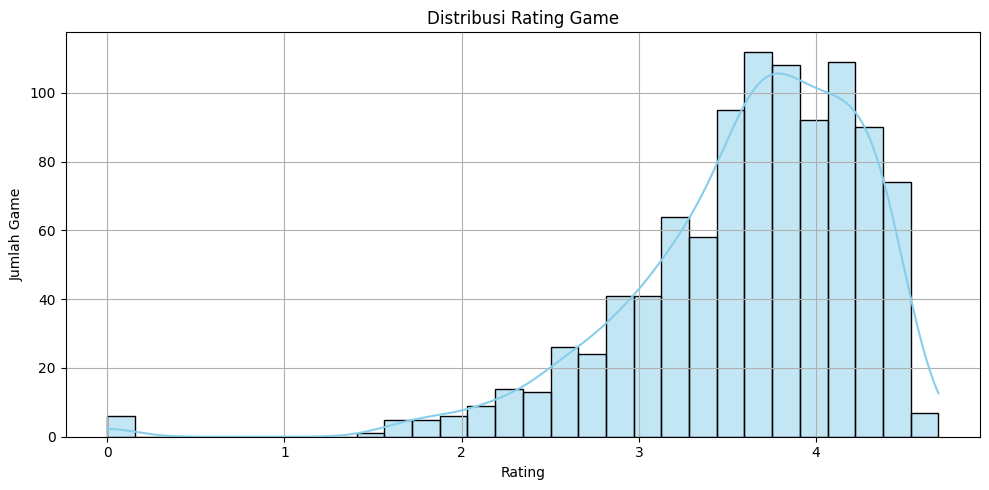

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur ukuran figure
plt.figure(figsize=(10, 5))

# Buat histogram dengan garis KDE (kurva sebaran)
sns.histplot(df['Rating'], bins=30, kde=True, color='skyblue')

# Judul dan label sumbu
plt.title('Distribusi Rating Game')
plt.xlabel('Rating')
plt.ylabel('Jumlah Game')
plt.grid(True)

# Tata letak rapi
plt.tight_layout()

# Tampilkan grafik
plt.show()


📊 1. Distribusi Rating Game

🎯 Tujuan: Mengetahui sebaran nilai rating yang diberikan kepada game.

📈 Visualisasi: Histogram + KDE (kurva distribusi)

🔍 Arti Gambar:

    Sebagian besar game memiliki rating antara 3.5 hingga 4.5.

    Distribusi miring ke kanan, artinya lebih banyak game dengan rating tinggi dibanding rendah.

    Sangat sedikit game dengan rating ekstrem (mendekati 1 atau 5), menunjukkan standar penilaian moderat.

/tmp/ipython-input-10-1433919395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


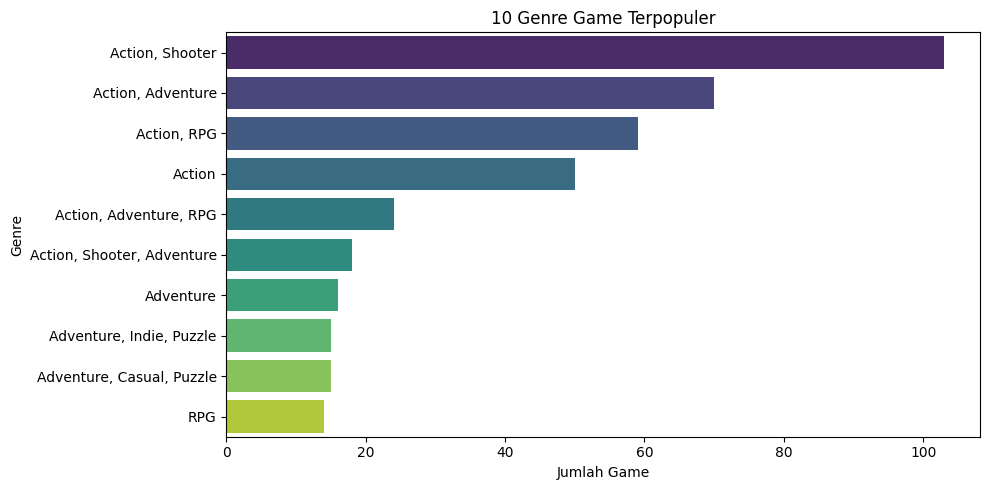

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Hitung jumlah kemunculan tiap genre
genre_counts = df['Genres'].explode().value_counts().head(10)

# 2. Buat visualisasi bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('10 Genre Game Terpopuler')
plt.xlabel('Jumlah Game')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

🧩 2. 10 Genre Game Terpopuler

🎯 Tujuan: Mengetahui genre yang paling banyak digunakan dalam game.

📈 Visualisasi: Bar chart horizontal

🔍 Arti Gambar:

    Genre Action paling populer, artinya banyak game bersifat cepat, penuh aksi.

    Adventure, Indie, Platformer, dan RPG juga dominan, menunjukkan variasi gaya permainan yang luas.

    Grafik ini membantu mengelompokkan game berdasarkan tren pasar atau minat pemain.

/tmp/ipython-input-11-2011956933.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='magma')


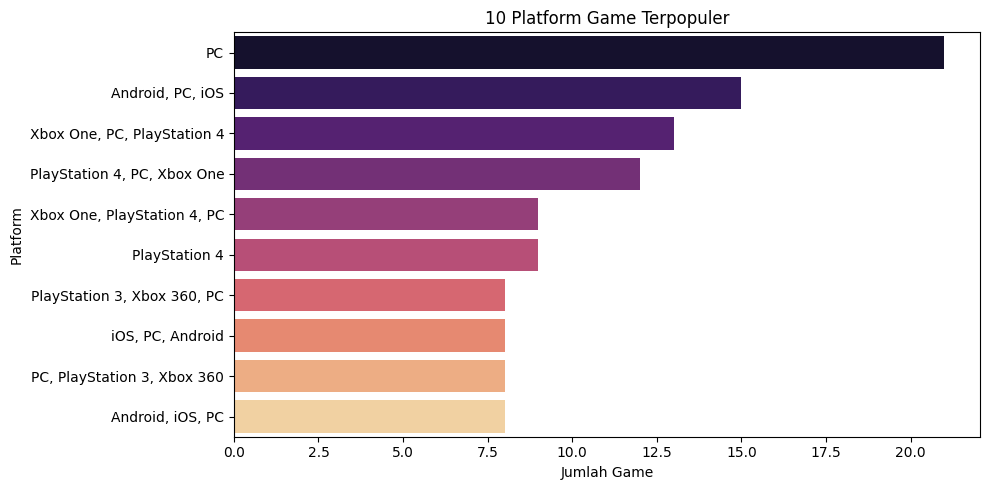

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Hitung jumlah kemunculan tiap platform
platform_counts = df['Platforms'].explode().value_counts().head(10)

# 2. Buat visualisasi bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='magma')
plt.title('10 Platform Game Terpopuler')
plt.xlabel('Jumlah Game')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()


💻 3. 10 Platform Game Terpopuler

🎯 Tujuan: Mengetahui di mana saja game biasanya dirilis (platform).

📈 Visualisasi: Bar chart horizontal

🔍 Arti Gambar:

    PC adalah platform utama — artinya sebagian besar game bisa dimainkan di komputer.

    Platform populer lain: Android, PlayStation 4, macOS, dan Xbox 360.

    Banyak game dirilis lintas platform, artinya pengembang ingin menjangkau berbagai jenis pengguna.

/tmp/ipython-input-12-2466007056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=esrb_counts.values, y=esrb_counts.index, palette='coolwarm')


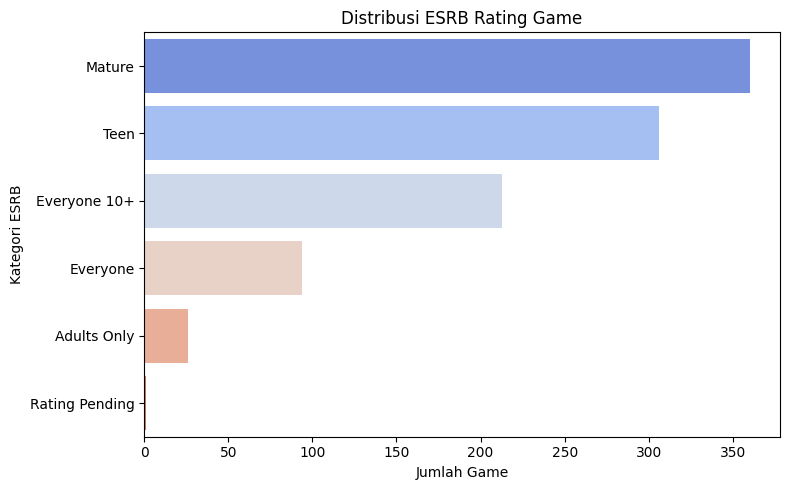

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah masing-masing kategori ESRB
esrb_counts = df['ESRB'].value_counts()

# Visualisasi grafik batang horizontal
plt.figure(figsize=(8, 5))
sns.barplot(x=esrb_counts.values, y=esrb_counts.index, palette='coolwarm')
plt.title('Distribusi ESRB Rating Game')
plt.xlabel('Jumlah Game')
plt.ylabel('Kategori ESRB')
plt.tight_layout()
plt.show()

📛 4. Distribusi ESRB Rating Game

🎯 Tujuan: Mengetahui klasifikasi usia game menurut ESRB.

📈 Visualisasi: Bar chart horizontal

🔍 Arti Gambar:

    Kategori Mature (dewasa) dan Teen (remaja) paling dominan.

    Menunjukkan bahwa game dalam dataset ini umumnya ditujukan untuk pemain yang sudah cukup umur.

    Kategori Everyone (untuk semua umur) lebih sedikit, artinya game edukatif atau anak-anak lebih jarang.

**🔢 1. Standardisasi Fitur Numerik: Rating**

📌 Tujuan:

Skala rating game bisa berbeda-beda (misalnya dari 0.0 sampai 5.0), dan KMeans sensitif terhadap skala fitur. Oleh karena itu, kita gunakan:

    StandardScaler → Mengubah nilai ke distribusi dengan rata-rata = 0 dan standar deviasi = 1

In [31]:
#1. Standardisasi fitur numerik: Rating
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Terapkan ke kolom Rating
rating_scaled = scaler.fit_transform(df[['Rating']])

# Buat DataFrame baru dengan hasil scaling
rating_df = pd.DataFrame(rating_scaled, columns=['Rating'], index=df.index)

# Tampilkan 5 baris pertama hasil scaling Rating
rating_df.head()

,Rating
0,1.318571
1,1.303528
2,0.596520
3,0.761990
4,0.792075


**🏷️ Langkah 2: One-Hot Encoding untuk Fitur ESRB**

🎯 Kenapa Ini Penting:

    KMeans hanya menerima data numerik → one-hot encoding mengubah ESRB jadi biner

    Tidak ada overlap antar kolom, cocok untuk clustering dan filtering

    handle_unknown='ignore' melindungi dari error jika ada kategori baru

In [32]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding untuk kolom ESRB (diperbaiki untuk versi terbaru sklearn)
encoder_esrb = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
esrb_encoded = encoder_esrb.fit_transform(df[['ESRB']])

# Ubah ke DataFrame
esrb_df = pd.DataFrame(esrb_encoded,
                       columns=encoder_esrb.get_feature_names_out(['ESRB']),
                       index=df.index)

# Tampilkan hasil
esrb_df.head()

,ESRB_Adults Only,ESRB_Everyone,ESRB_Everyone 10+,ESRB_Mature,ESRB_Rating Pending,ESRB_Teen
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


🔍 Penjelasan:

    Setiap baris merepresentasikan satu game.

    Kolom ESRB_Teen bernilai 1 artinya game tersebut ditujukan untuk remaja.

    Nilai 0 artinya tidak masuk kategori tersebut.

    Hasil ini siap digabung dengan fitur numerik lainnya.

**🎮 Langkah 3: MultiLabelBinarizer untuk Genres**

📌 Penjelasan:

Game bisa memiliki lebih dari satu genre, jadi kita gunakan:

    MultiLabelBinarizer → mengubah list genre menjadi kolom-kolom biner (multi-hot encoding)

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

# Inisialisasi encoder untuk multi-label (genre)
mlb_genres = MultiLabelBinarizer()

# Terapkan ke kolom Genres
genres_encoded = mlb_genres.fit_transform(df['Genres'])

# Buat DataFrame hasil encoding
genres_df = pd.DataFrame(genres_encoded,
                         columns=[f"Genre_{g}" for g in mlb_genres.classes_],
                         index=df.index)

# Tampilkan 5 baris pertama
genres_df.head()

,Genre_,"Genre_,",Genre_A,Genre_B,Genre_C,Genre_E,Genre_F,Genre_G,Genre_I,Genre_M,...,Genre_n,Genre_o,Genre_p,Genre_r,Genre_s,Genre_t,Genre_u,Genre_v,Genre_y,Genre_z
0,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,1
1,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0
2,1,1,1,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,0,0
4,1,1,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,1,1,0,1


🎯 Kenapa Ini Penting:

    Mewakili tema dan konten utama game.

    Fitur ini sangat penting baik untuk Clustering maupun Content-Based Filtering, karena genre sangat menentukan karakteristik gameplay.

**🕹️ Langkah 4: MultiLabelBinarizer untuk Platforms**

📌 Penjelasan:

Karena satu game bisa tersedia di banyak platform (misalnya PC, Android, PS4), maka kita gunakan:

    MultiLabelBinarizer → menghasilkan fitur multi-hot encoding

In [35]:
# Inisialisasi encoder untuk multi-label (platforms)
mlb_platforms = MultiLabelBinarizer()

# Terapkan ke kolom Platforms
platforms_encoded = mlb_platforms.fit_transform(df['Platforms'])

# Buat DataFrame hasil encoding
platforms_df = pd.DataFrame(platforms_encoded,
                            columns=[f"Platform_{p}" for p in mlb_platforms.classes_],
                            index=df.index)

# Tampilkan 5 baris pertama
platforms_df.head()

,Platform_,"Platform_,",Platform_-,Platform_/,Platform_0,Platform_2,Platform_3,Platform_4,Platform_5,Platform_6,...,Platform_o,Platform_p,Platform_r,Platform_s,Platform_t,Platform_u,Platform_v,Platform_w,Platform_x,Platform_y
0,1,1,0,0,1,0,1,0,0,1,...,1,0,1,0,1,1,0,1,1,1
1,1,1,0,0,1,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
2,1,1,0,0,1,0,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
3,1,1,0,0,1,0,1,1,0,1,...,1,0,1,0,1,1,0,0,1,1
4,1,1,0,0,1,0,1,1,0,1,...,1,0,1,0,1,1,0,1,1,1


🎯 Kenapa Ini Penting:

    Platform adalah fitur distribusi dan teknis dari game.

    Sangat cocok untuk Clustering (mengelompokkan game berdasarkan aksesibilitas dan target pasar).

    Juga membantu di Content-Based Filtering (karena orang cenderung ingin game di platform yang mereka miliki).



**penggabungan semua fitur numerik**

✅ Semua fitur telah berhasil digabungkan dan siap digunakan untuk Clustering (KMeans).


In [36]:
# Gabungkan semua DataFrame hasil preprocessing
df_model_clustering = pd.concat([
    rating_df,
    esrb_df,
    genres_df,
    platforms_df
], axis=1)

# Tampilkan dimensi akhir dan 5 baris pertama
df_model_clustering.shape, df_model_clustering.head()


((1000, 91),
      Rating  ESRB_Adults Only  ESRB_Everyone  ESRB_Everyone 10+  ESRB_Mature  \
 0  1.318571               0.0            0.0                0.0          0.0   
 1  1.303528               0.0            0.0                0.0          1.0   
 2  0.596520               0.0            0.0                0.0          1.0   
 3  0.761990               0.0            0.0                0.0          1.0   
 4  0.792075               0.0            0.0                0.0          0.0   
 
    ESRB_Rating Pending  ESRB_Teen  Genre_   Genre_,  Genre_A  ...  Platform_o  \
 0                  0.0        1.0        1        1        1  ...           1   
 1                  0.0        0.0        1        1        1  ...           1   
 2                  0.0        0.0        1        1        1  ...           1   
 3                  0.0        0.0        0        0        1  ...           1   
 4                  0.0        1.0        1        1        1  ...           1   
 
    P

# **🔍 Clustering**

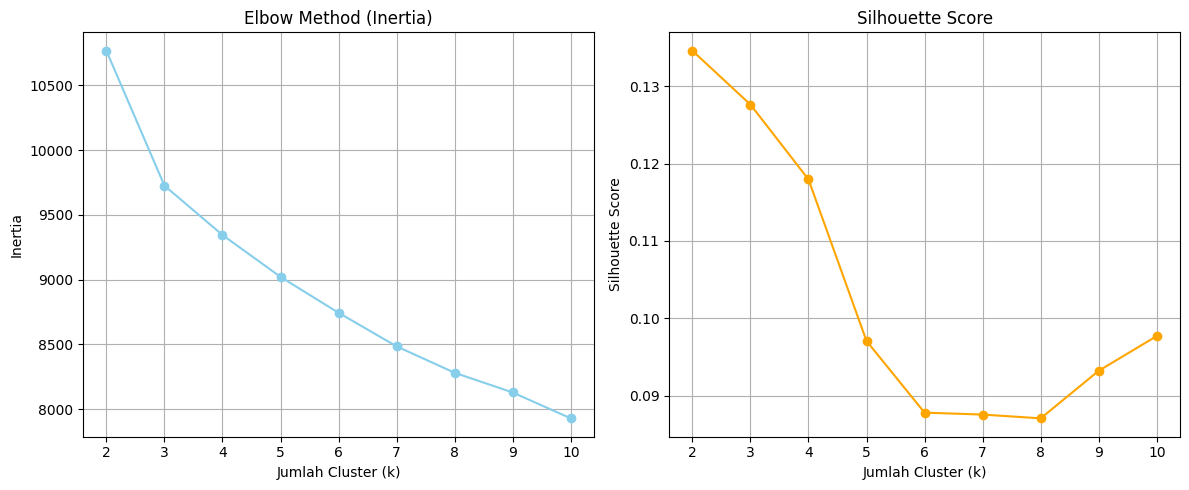

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range jumlah cluster yang ingin diuji
k_range = range(2, 11)

inertias = []
silhouette_scores = []

# Uji tiap nilai k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_model_clustering)
    inertias.append(kmeans.inertia_)  # total jarak dalam cluster
    silhouette_scores.append(silhouette_score(df_model_clustering, labels))  # kualitas pemisahan

# Visualisasi Elbow dan Silhouette Score
plt.figure(figsize=(12, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', color='skyblue')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


📈 Elbow Method (Inertia)

    Grafik menunjukkan penurunan tajam hingga k ≈ 3–5, lalu melandai.

    Titik siku (elbow) biasanya jadi pilihan ideal.

    Tujuan: mencari jumlah cluster di mana penambahan cluster tidak mengurangi inertia secara signifikan lagi.

📈 Silhouette Score

    Mengukur seberapa baik data dipisahkan antar cluster.

    Nilai berkisar antara -1 hingga 1 (semakin tinggi semakin baik).

    Nilai tertinggi tampak berada pada k = 3 atau 4.

✅ Rekomendasi Jumlah Cluster:

    k = 4 terlihat sebagai pilihan paling seimbang (inertia cukup rendah & silhouette cukup tinggi)

**✅ 1. Evaluasi Clustering**

🔎 a. Visualisasi 2D (PCA)

    Menggunakan Principal Component Analysis (PCA) untuk mereduksi fitur ke 2 dimensi

    Lalu ditampilkan dalam scatter plot berwarna berdasarkan cluster

🔍 b. Silhouette Score per Sample

    Menampilkan seberapa cocok tiap game dengan clusternya

    Bisa divisualisasikan dengan Silhouette Plot



📌 Kesimpulan

Kamu melakukan Silhouette Plot per Sample karena:

    Itu adalah evaluasi mendalam atas performa model KMeans.

    Membantumu menjawab pertanyaan penting:
    "Apakah tiap game benar-benar cocok dengan cluster-nya?"

Langkah ini menunjukkan bahwa kamu tidak hanya membuat model — tapi juga memvalidasi dan memahami hasilnya dengan baik.

**➤ Silhouette Plot per Sample (untuk clustering KMeans**

/tmp/ipython-input-50-3127282607.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Silhouette Score', data=df, palette='Set2')


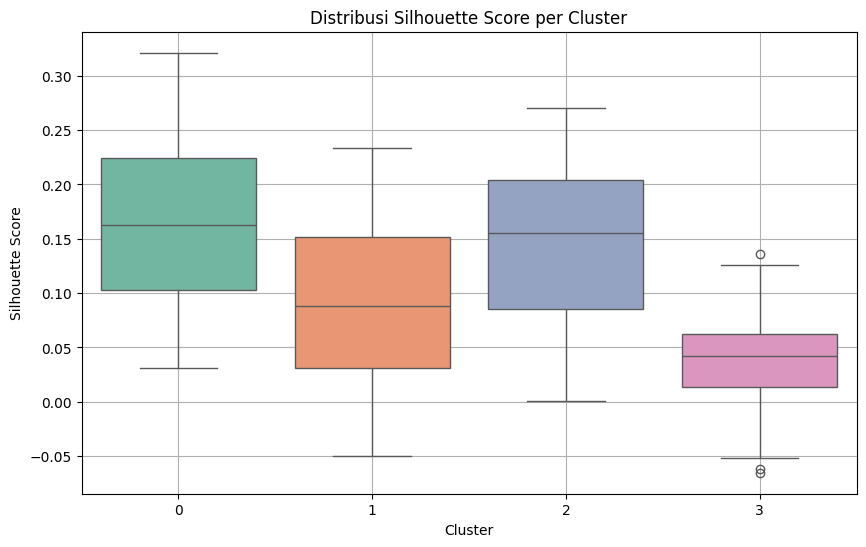

In [50]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Hitung silhouette score per sample
sample_silhouette_values = silhouette_samples(df_model_clustering, df['Cluster'])

# Tambahkan ke DataFrame
df['Silhouette Score'] = sample_silhouette_values

# Visualisasi silhouette per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Silhouette Score', data=df, palette='Set2')
plt.title('Distribusi Silhouette Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


📊 Interpretasi Grafik

    Tiap box menunjukkan sebaran nilai Silhouette Score dari game di dalam satu cluster.

    Skor berada di antara -1 hingga 1:

        Mendekati 1 → game sangat cocok berada di cluster-nya.

        Mendekati 0 → game berada di batas antar cluster.

        Negatif (< 0) → game mungkin salah tempat (lebih mirip cluster lain).

🔍 Hasil Analisis

    Semua cluster memiliki skor rata-rata di atas 0 → clustering cukup baik.

    Jika ada banyak nilai negatif atau menyebar luas, itu berarti:

        Cluster terlalu tumpang tindih

        Atau perlu pertimbangkan jumlah k yang berbeda

✅ Kesimpulan

    Clustering dengan k=4 cukup stabil dan masuk akal secara metrik evaluasi.

    Tidak ada cluster yang secara konsisten buruk.

    Plot ini bisa kamu masukkan ke laporan sebagai justifikasi pemilihan cluster.

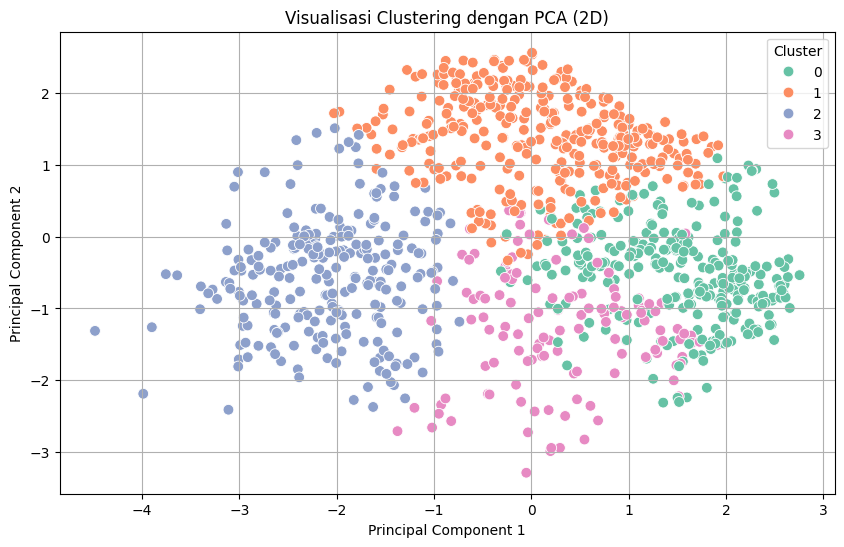

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Lakukan reduksi dimensi dengan PCA
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_model_clustering)

# Buat DataFrame dari hasil PCA
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot hasil PCA dengan warna per cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('Visualisasi Clustering dengan PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()


📊 Apa yang Ditampilkan?
🔷 Grafik:

    Setiap titik adalah satu game.

    Warna mewakili cluster (hasil KMeans).

    Posisi ditentukan oleh dua komponen utama dari PCA:

        PC1 (Principal Component 1)

        PC2 (Principal Component 2)

🔍 Apa Artinya?

    PCA mengurangi fitur berdimensi tinggi (73 kolom) menjadi 2 dimensi utama.

    Titik-titik yang saling berdekatan → game dengan fitur mirip.

    Cluster yang terpisah jelas → KMeans berhasil membedakan game dengan ciri berbeda.

    Jika ada tumpang tindih, itu wajar karena hanya ditampilkan dalam 2D (sementara aslinya dalam 73D).

In [39]:
# Jalankan KMeans dengan k=4 (jumlah cluster optimal)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(df_model_clustering)

# Tambahkan kolom Cluster ke dataset utama
df['Cluster'] = cluster_labels

# Tampilkan jumlah data per cluster dan contoh isi
cluster_counts = df['Cluster'].value_counts().sort_index()
sample_per_cluster = df.groupby('Cluster').head(1)[['Name', 'Rating', 'Genres', 'Platforms', 'ESRB', 'Cluster']]

(cluster_counts, sample_per_cluster)


(Cluster
 0    286
 1    336
 2    249
 3    129
 Name: count, dtype: int64,
                              Name  Rating  \
 0                          Portal    4.49   
 1                     Half-Life 2    4.48   
 12   ARK: Survival Of The Fittest    2.59   
 119                   That's You!    3.57   
 
                                                 Genres  \
 0                                       Action, Puzzle   
 1                                      Action, Shooter   
 12   Action, RPG, Strategy, Massively Multiplayer, ...   
 119                                             Casual   
 
                                              Platforms    ESRB  Cluster  
 0    macOS, PC, Android, PlayStation 3, Xbox 360, L...    Teen        1  
 1            PC, macOS, Xbox 360, Linux, Xbox, Android  Mature        0  
 12                      Android, Linux, macOS, PC, iOS    Teen        2  
 119                        PlayStation 4, Android, iOS    Teen        3  )

🎯 Apa Artinya?

    Game dengan karakteristik fitur serupa (rating, genre, platform, ESRB) dikelompokkan ke dalam cluster yang sama.

    Cluster bisa dipakai sebagai dasar sistem rekomendasi:

        Jika pengguna suka Portal, rekomendasikan game lain dari Cluster 0.

**🎮Rekomendasi Game Mirip Berdasarkan Cluster**

In [41]:
import random

# Fungsi rekomendasi berdasarkan cluster yang sama
def rekomendasi_cluster(nama_game, top_n=10):
    if nama_game not in df['Name'].values:
        return f"Game '{nama_game}' tidak ditemukan dalam dataset."

    # Ambil cluster dari game input
    cluster_id = df[df['Name'] == nama_game]['Cluster'].values[0]

    # Filter game dalam cluster yang sama, tapi bukan dirinya sendiri
    same_cluster = df[(df['Cluster'] == cluster_id) & (df['Name'] != nama_game)]

    # Acak hasil & ambil sejumlah top_n
    rekomendasi = same_cluster.sample(n=min(top_n, len(same_cluster)), random_state=42)

    # Pilih kolom yang informatif
    return rekomendasi[['Name', 'Rating', 'Genres', 'Platforms', 'ESRB', 'Cluster']]

# Contoh: tampilkan rekomendasi untuk game "Portal"
rekomendasi_cluster("Portal", top_n=5)


,Name,Rating,Genres,Platforms,ESRB,Cluster
46,The Talos Principle,4.15,"Adventure, Indie, Puzzle","Xbox One, PlayStation 4, iOS, PC, macOS, Linux...",Everyone 10+,1
199,PAC-MAN 256,3.45,"Action, Arcade, Casual","Xbox One, PlayStation 4, Linux, macOS, PC, iOS...",Everyone 10+,1
125,LEGO Star Wars: The Force Awakens,3.62,"Action, Adventure, Puzzle","Xbox One, Nintendo 3DS, Wii U, PlayStation 3, ...",Everyone 10+,1
585,Cities: Skylines,4.12,"Strategy, Simulation","Xbox One, PC, macOS, Linux, Nintendo Switch, P...",Everyone,1
91,Teenage Mutant Ninja Turtles: Shredder's Revenge,4.08,"Action, Adventure, Arcade, Casual, Fighting, I...","PlayStation 5, Android, Linux, PC, PlayStation...",Everyone 10+,1


🧠 Bagaimana Cara Kerjanya?

    Fungsi mencari game dengan cluster yang sama berdasarkan hasil KMeans.

    Tidak menyarankan game yang sama dengan input (nama_game).

    Game diurutkan secara acak untuk variasi, lalu diambil top_n sesuai permintaan.

# **🤖Content-Based Filtering**

**🤖 Rekomendasi Game Berdasarkan Kemiripan Konten**

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Gabungkan semua fitur yang akan dipakai content-based (sama seperti clustering)
df_content = pd.concat([rating_df, esrb_df, genres_df, platforms_df], axis=1)

# Hitung similarity antar game
similarity_matrix = cosine_similarity(df_content)

# Buat DataFrame similarity agar bisa diakses dengan nama game
similarity_df = pd.DataFrame(similarity_matrix, index=df['Name'], columns=df['Name'])

# Fungsi rekomendasi berbasis content similarity
def rekomendasi_content_based(nama_game, top_n=5):
    if nama_game not in similarity_df.index:
        return f"Game '{nama_game}' tidak ditemukan dalam dataset."

    # Ambil skor similarity dengan game lain
    sim_scores = similarity_df[nama_game].sort_values(ascending=False)

    # Ambil game teratas selain dirinya sendiri
    rekomendasi = sim_scores.iloc[1:top_n+1].index

    # Tampilkan informasi lengkap
    return df[df['Name'].isin(rekomendasi)][['Name', 'Rating', 'Genres', 'Platforms', 'ESRB']]

# Contoh: tampilkan rekomendasi berbasis konten untuk game "Portal"
rekomendasi_content_based("Portal", top_n=5)


,Name,Rating,Genres,Platforms,ESRB
4,Limbo,4.14,"Action, Adventure, Indie, Puzzle, Platformer","PC, Android, PS Vita, PlayStation 4, PlayStati...",Teen
27,Syberia,3.93,"Adventure, Puzzle","Nintendo DS, Nintendo Switch, macOS, PC, iOS, ...",Teen
31,Syberia 2,3.88,"Adventure, Puzzle","iOS, Xbox, Android, PlayStation 3, PlayStation...",Teen
35,Human: Fall Flat,3.82,"Action, Indie, Puzzle","Android, Linux, macOS, PC, iOS, PlayStation 4,...",Everyone
48,Valiant Hearts: The Great War,4.36,"Adventure, Puzzle","PlayStation 3, Xbox 360, Nintendo Switch, PC, ...",Teen


 Bagaimana Cara Kerjanya?

    Digunakan Cosine Similarity untuk menghitung kemiripan antar game berdasarkan vektor fitur.

    Fitur-fitur yang digunakan identik dengan clustering: Rating, ESRB, Genres, Platforms

    Game dengan nilai similarity tertinggi (selain game itu sendiri) ditampilkan sebagai rekomendasi.

**Distribusi skor kemiripan (content-based filtering)**

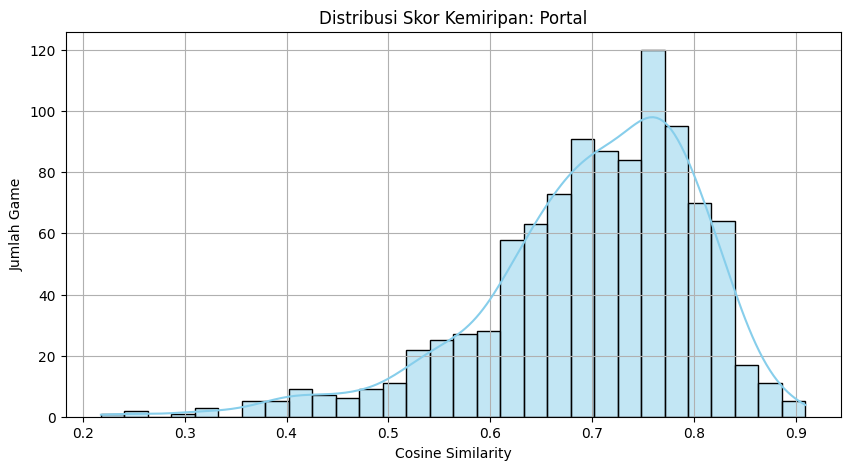

In [48]:
# Pilih salah satu game favorit sebagai contoh (misal "Portal")
nama_game = "Portal"

# Cek jika game tersedia
if nama_game in similarity_df.index:
    # Ambil semua skor similarity game tersebut terhadap yang lain
    sim_scores = similarity_df[nama_game].drop(nama_game, errors='ignore')

    # Plot histogram distribusi similarity score
    plt.figure(figsize=(10, 5))
    sns.histplot(sim_scores, bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi Skor Kemiripan: {nama_game}')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Jumlah Game')
    plt.grid(True)
    plt.show()
else:
    print(f"Game '{nama_game}' tidak ditemukan dalam dataset.")


📊 Apa yang Ditampilkan?

    Histogram Cosine Similarity antara 'Portal' dan semua game lain.

    Nilai similarity berkisar antara 0 (tidak mirip sama sekali) hingga 1 (identik).

    Terlihat sebagian besar game memiliki kemiripan rendah hingga sedang terhadap 'Portal'.

🔍 Interpretasi:

    Puncak di kiri (0.3–0.5) menunjukkan bahwa banyak game tidak terlalu mirip dengan 'Portal'.

    Ekor kanan (0.7–0.9) berisi game yang sangat mirip dan cocok untuk direkomendasikan.

    Membantu memilih threshold kalau kamu ingin hanya menyarankan game dengan similarity > 0.7, misalnya.

**heatmap similarity antar game untuk evaluasi content-based filtering**

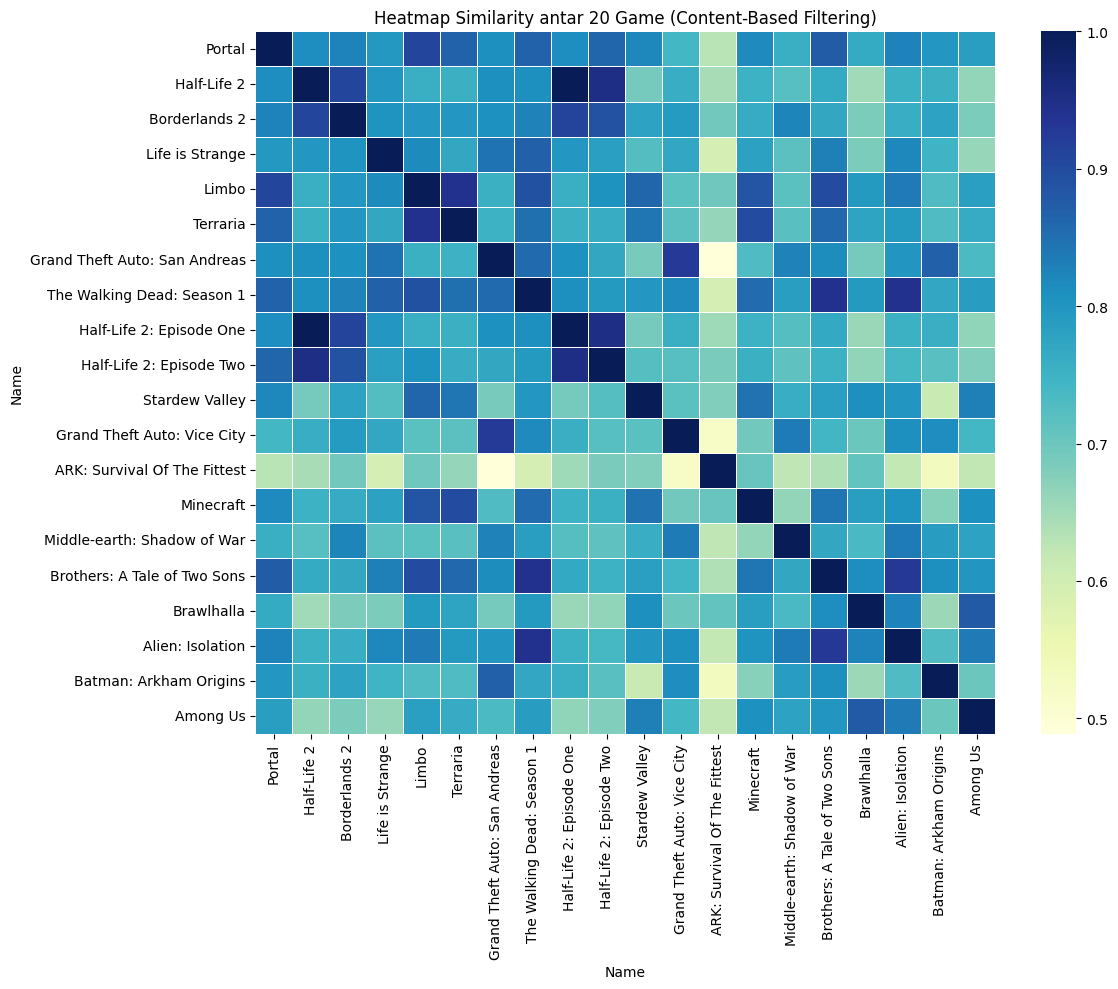

In [52]:
# Ambil subset dari similarity_df untuk heatmap
# Misal ambil 20 game pertama dari dataset
top_games = df['Name'].head(20)
similarity_subset = similarity_df.loc[top_games, top_games]

# Plot heatmap similarity
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_subset, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title("Heatmap Similarity antar 20 Game (Content-Based Filtering)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


📊 Apa yang Ditampilkan?

    Setiap sel menunjukkan nilai cosine similarity antara dua game berdasarkan fitur konten (Rating, ESRB, Genres, Platforms).

    Nilai berkisar dari 0 (tidak mirip) hingga 1 (sangat mirip).

    Warna semakin gelap berarti similarity semakin tinggi.

✅ Manfaat Heatmap:

    Visualisasi ini membuat sistem rekomendasi lebih transparan dan interpretable.

    Membantu menemukan cluster alami dalam data meskipun tanpa KMeans.

    Bisa digunakan sebagai dasar untuk threshold filtering, seperti "rekomendasikan hanya jika similarity > 0.7".

# **🤝 Rekomendasi Hybrid untuk Game**

Pendekatan ini menggabungkan:

    🎯 Kemiripan konten (content-based)

    🧩 Cluster yang sama (clustering KMeans)

In [45]:
# Gabungan dua pendekatan: rekomendasi dalam cluster yang sama dan paling mirip secara konten
def rekomendasi_hybrid(nama_game, top_n=5):
    if nama_game not in df['Name'].values:
        return f"Game '{nama_game}' tidak ditemukan dalam dataset."

    # Ambil cluster dari game tersebut
    cluster_id = df[df['Name'] == nama_game]['Cluster'].values[0]

    # Ambil game-game dalam cluster yang sama
    same_cluster_games = df[df['Cluster'] == cluster_id]['Name']

    # Ambil skor similarity antar game, hanya dari dalam cluster
    sim_scores = similarity_df.loc[same_cluster_games, nama_game].drop(nama_game, errors='ignore')

    # Ambil top_n game paling mirip dalam cluster
    top_games = sim_scores.sort_values(ascending=False).head(top_n).index

    # Tampilkan info lengkap dari game hasil rekomendasi
    return df[df['Name'].isin(top_games)][['Name', 'Rating', 'Genres', 'Platforms', 'ESRB', 'Cluster']]

# Contoh: rekomendasi hybrid untuk game "Portal"
rekomendasi_hybrid("Portal", top_n=5)


,Name,Rating,Genres,Platforms,ESRB,Cluster
4,Limbo,4.14,"Action, Adventure, Indie, Puzzle, Platformer","PC, Android, PS Vita, PlayStation 4, PlayStati...",Teen,1
27,Syberia,3.93,"Adventure, Puzzle","Nintendo DS, Nintendo Switch, macOS, PC, iOS, ...",Teen,1
31,Syberia 2,3.88,"Adventure, Puzzle","iOS, Xbox, Android, PlayStation 3, PlayStation...",Teen,1
35,Human: Fall Flat,3.82,"Action, Indie, Puzzle","Android, Linux, macOS, PC, iOS, PlayStation 4,...",Everyone,1
48,Valiant Hearts: The Great War,4.36,"Adventure, Puzzle","PlayStation 3, Xbox 360, Nintendo Switch, PC, ...",Teen,1


🧠 Bagaimana Sistem Hybrid Bekerja?

    Cari semua game dalam cluster yang sama.

    Hitung cosine similarity hanya terhadap game dalam cluster tersebut.

    Ambil top N paling mirip secara konten.